<span style="font-family: Palatino; font-size: 40px; color: purple">
             Homework - build a walk-forward testing harness 
</span>


Copyright (c) 2022 RM Stein.

This version: 8-22-2002

<span style="color:purple; font-size:30px">
    <b>Background</b>
</span>

## <span style="color:purple"> 0.1 Business context </span>

__You are working on a trading desk and have been asked by a trader to evaluate whether a simple model can be used to make useful predictions about market direction.__


## <span style="color:purple"> 0.2 Mandate </span>

In order to demonstrate the robustness of your models (or highlight the lack thereof) you will need to build a walk-forward testing harness.  The harness should include the following functions:

```python

# ------------------------
# ------------------------

def walk_forward_harness(df, preprocessor, estimator, predictor, 
                         start, date_col = 'Date', step_size = 1):     
    # your code here
    return(predictions, model_list, stats_list)

# ------------------------

def predictor_harness(new_df, model, preprocessor, preproc_params = {}):
    
    # your code here
    return(predictions)

# ------------------------
    
def preprocessor(df, preproc_params = {}, new = True):
    # your code here
    return(new_df, preproc_params)

# ------------------------
    
def estimator(df, fitting_algo, est_params = {}):
    # your code here    
    return(model)

# ------------------------
    
def predictor(new_df, model):
    # your code here
    return(predictions)

# ------------------------
# ------------------------

```
where
    

| argument | Description| Returns |
| :--   | -:-  | :-- |
|`df, new_df`|  a Pandas `DataFrame` containing the data to be modeled       | NA
|`start`           |  a date index value after which to start the walk-forward test| NA
|`date_col` | the column index (integer or str) of the column in `df` that holds the date information for each row | NA
|`step_size`| the number of time units to move forward in each walk-forward step. | NA
|`model`           | a fitted model that can be used to make predictions.  (This may, itself, be a function.) | NA 
|`model_list` | a list of models, one for each walk-forward step, of length equal to the number of walk-forward steps| NA
|`stats_list` | a list of statistics (possibly a list of lists or tupples), with one entry for each walk-forward step, of length equal to the number of walk-forward step| NA
|`preproc_params` | parameters used by `preprocessor` | NA
|`new`            | boolean indicating whether `df` should be used to estimate the parameters required by `preproc`
|`predictions`     | a vector of predictions of the same length as the number of rows in `new_df`.  If data record `i`  cannot be processed (e.g., due to missing values or division by zero, etc.), predictions `i` should be set to `np.nan` | NA 
|`preprocessor`    |  a function that takes as input `df` containing raw data to be modeled; `preproc_params`, a list of preprocessing parameters if needed; and `new`, a flag indicating whether new parameters should be estimated |  `new_df`, the preprocessed data to be modeled, `preproc_params` a list that is either empty or that contains any parameters estimated during preprocessing
|`estimator`       |  a function that takes as input `df` of data to be modeled, `fitting_algo`, a function that estimates the model; and `est_params`, any other arguments required. | a model object that can be read by `predictor`
|`predictor`       |  a function that takes as input `new_df` containing raw data for which predictions should be generated; a `model`,  a model object estimated by `estimator`, `preprocessor`, see above; and any other arguments required         | a vector containing one entry for each row in the data frame
|`predictor_harness` | a function that takes in a raw data set and produces a dataset structured and formatted in the manner required by `predictor` | a vector containing one entry for each row in the data frame


In [1114]:
import pandas as pd
import numpy as np

In [1115]:
HW01_SPX = pd.read_csv("HW01_SPX.csv")

In [1116]:
HW01_SPX

,Date,Open,High,Low,Close
0,2000-01-03,1455.22,1478.00,1438.36,1455.22
1,2000-01-04,1399.42,1455.22,1397.43,1399.42
2,2000-01-05,1402.11,1413.27,1377.68,1402.11
3,2000-01-06,1403.45,1411.90,1392.02,1403.45
4,2000-01-07,1441.47,1441.47,1400.53,1441.47
...,...,...,...,...,...
5414,2021-07-12,4372.41,4386.68,4364.03,4384.63
5415,2021-07-13,4381.07,4392.37,4366.92,4369.21
5416,2021-07-14,4380.11,4393.68,4362.36,4374.30
5417,2021-07-15,4369.02,4369.02,4340.70,4360.03


## <span style="color:purple"> 0.3 Requirements</span>

* Please use `statsmodels.api` for your analysis.  
* Please use the raw data from 1.1.1 of HW01 (`HW01_Financial_Mathematics.ipynb`) for your modeling.
* Please use the data prior to 07/17/2017 (July, 17) and assume that you will know the prior trading day's closing price before the next day's market open.
* Please ignore the effects of weekends and holidays on the returns and volatities.

In [775]:
def walk_forward_harness(df, preprocessor, estimator, predictor, 
                         start, date_col = 'Date', step_size = 1):     
    data = pd.DataFrame(df)
    return(predictions, model_list, stats_list)

# ------------------------

def predictor_harness(new_df, model, preprocessor, preproc_params = {}):

    data = pd.DataFrame(new_df)
    
    return(predictions)

# ------------------------

def preprocessor(df, preproc_params = {}, new = True):
    # your code here
    return(new_df, preproc_params)

# ------------------------

def estimator(df, fitting_algo, est_params = {}):
    # your code here    
    return(model)

# ------------------------

def predictor(new_df, model):
    # your code here
    return(predictions)

# ------------------------
# ------------------------

## <span style="color:purple"> 0.4 Helper functions </span>

In [776]:
def progress_bar(k, n, incr_txt="Step", bar_len = 10):
   
    bar_char  = u'\u25A5'
    line_char = u'\u21E2' # u'\u2192'  u'\u23AF' u'\u25AD'
    
    places   = int(np.ceil(n/bar_len))
    pct      = k/n
    n_str    = "{:,.0f}".format(n)        
    k_str    = "{:,.0f}".format(k)
    pct_str  = "{:,.0f}%".format(k/n * 100)
    # d_format = "%" + str(places) + "d"
    
    if k == n-1:
        n_bars = bar_len
        n_spaces = 0
        text_txt = "Completed " + n_str + " " + incr_txt + "s."
    else:
        n_bars   = int(np.floor(pct * bar_len))
        n_spaces = bar_len - n_bars
        text_txt = " " + pct_str +  " (" + incr_txt + " " + k_str + " of  " + n_str + ")."

    bar_txt  = "[" + "".ljust(n_bars,bar_char) + "".rjust(n_spaces,line_char) + "]  " 

    clear_output()
    display(bar_txt + text_txt)

# <span style="color:purple"> 1 Model Building Phase </span>

## 1.1 Preprocessing

### 1.1.1 Dependent variable (target feature)

#### 1.1.1.1 Calculate the log returns for the `Close` (price) in the data, and print the quantiles of this new variable.  Add this new variable to your data set.

In [1117]:
log_r = (np.log(HW01_SPX["Close"]/HW01_SPX["Close"].shift(1)))
# np.quantile(HW01_SPX["log return"], 0.25)
# HW01_SPX["log return"].dropna()
# HW01_SPX["log return"]
HW01_SPX["LOG_RETURN"] = log_r

HW01_SPX["LOG_RETURN"].quantile([0.25, 0.5, 0.75, 1])

0.25   -0.004724
0.50    0.000600
0.75    0.005813
1.00    0.109572
Name: LOG_RETURN, dtype: float64

#### 1.1.1.2 Create a new variable `positive_return_dummy` that takes the value `1` if the return for the day is greater than 0 and `0` otherwise.  This will be your dependent variable.

In [1118]:
HW01_SPX["positive_return_variable"] = HW01_SPX["LOG_RETURN"].apply(lambda x: 1 if x > 0 else 0)



### 1.1.2 Independent variables

#### 1.1.2.1 Create a new variables for the 30 day volatility of the returns, and print the quantiles of this new variable and print the quantiles. Add this new variable to your data set.  

In [1119]:
log_ret = HW01_SPX["LOG_RETURN"].to_frame()
# HW01_SPX["Volatility 30 days"] = log_ret.rolling(30).mean()

In [780]:
# log_ret.groupby(np.arange(len(log_ret))//30).std()

In [1120]:
# HW01_SPX["30_vol"] = log_ret.groupby(np.arange(len(log_ret))//30).std()
HW01_SPX["30_vol"] = log_ret.rolling(30).std()

In [1121]:
HW01_SPX["30_vol"].quantile([0.25, 0.5, 0.75, 1])


0.25    0.006324
0.50    0.008611
0.75    0.012904
1.00    0.054091
Name: 30_vol, dtype: float64

### 1.1.3 Time structure

#### 1.1.3.1 Please shift your dependent variable by one day (as we did in 4.1 of HW01) so that the values of $x_{t-1}$ of the independent variables are associated (in the same row as) the values of $y_t$ (the dependent variable).  Now please relabel all of your independent variables `xxx_L01d`, where `xxx` is the original name of the variable (e.g., `Close` would become `Close_L01d`).  This will help us remember which variables were shifted forward go with which dates (i.e., the `_L01d` suffix reminds us that that varaible represents the value as of the previous trading period.)   Please print the head of your newly labeled dataframe.

In [1122]:
HW01_SPX["positive_return_variable"] = HW01_SPX["positive_return_variable"].shift(1)


In [1123]:
HW01_SPX = HW01_SPX.add_suffix("_L01d")

In [1132]:
HW01_SPX

,Date_L01d,Open_L01d,High_L01d,Low_L01d,Close_L01d,LOG_RETURN_L01d,30_vol_L01d,positive_return_variable
0,2000-01-03,1455.22,1478.00,1438.36,1455.22,NaN,NaN,NaN
1,2000-01-04,1399.42,1455.22,1397.43,1399.42,-0.039099,NaN,0.0
2,2000-01-05,1402.11,1413.27,1377.68,1402.11,0.001920,NaN,0.0
3,2000-01-06,1403.45,1411.90,1392.02,1403.45,0.000955,NaN,1.0
4,2000-01-07,1441.47,1441.47,1400.53,1441.47,0.026730,NaN,1.0
...,...,...,...,...,...,...,...,...
5414,2021-07-12,4372.41,4386.68,4364.03,4384.63,0.003445,0.005431,1.0
5415,2021-07-13,4381.07,4392.37,4366.92,4369.21,-0.003523,0.005505,1.0
5416,2021-07-14,4380.11,4393.68,4362.36,4374.30,0.001164,0.005495,0.0
5417,2021-07-15,4369.02,4369.02,4340.70,4360.03,-0.003268,0.005559,1.0


### 1.2 Building a basic to toy model

### 1.2.1 Take 1

#### 1.2.1.1 Please estimate a logit model in which the dependent variable is `positive_return_dummy` and your lagged variables are the previous day's 30 day volatility, the previous day's return, and the the previous days' closing price` using `statsmodels.api` and print the summary of the model.  

__As an example, if you were using the `formula` version of the API and had imported `statsmodels.api.formla`  as `sm`, your code might look like the following:__

```python
model = sm.logit(my_formula, data = df) 
logit_model_sm = model.fit()
print(logit_model_sm.summary())
```

(Hint, you will find it much easier to do the modeling if you use `statsmodels.api.formula` version of the API, which allows you to try different variables and variable transformations in your model without creating a new dataframe, by using R-style formula.  You can find a short tutorial on using `statsmodels.api.formula`  here: https://www.statsmodels.org/dev/example_formulas.html .  Once you get comfortable with the formula langauage, you can use it to create dataframes for other models (e.g., some of those in `sklearn`) by just writing the formula. Super handy.)

In [879]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [914]:
HW01_SPX = HW01_SPX.dropna().reset_index(drop=True)
y = HW01_SPX[["positive_return_variable"]]
x = HW01_SPX[["30_vol_L01d", "Close_L01d", "LOG_RETURN_L01d"]]

log_reg = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.688376
         Iterations 4


In [881]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                              
====================================================================================
Dep. Variable:     positive_return_variable   No. Observations:                 5389
Model:                                Logit   Df Residuals:                     5386
Method:                                 MLE   Df Model:                            2
Date:                      Tue, 25 Oct 2022   Pseudo R-squ.:                0.002736
Time:                              09:16:22   Log-Likelihood:                -3709.7
converged:                             True   LL-Null:                       -3719.8
Covariance Type:                  nonrobust   LLR p-value:                 3.806e-05
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
30_vol_L01d        -3.4229      3.161     -1.083      0.279      -9.619       2.773
Close_L01d          0.0001   2.11e-05      5.045      0.000    6.52e-05       0.000
LOG_RETURN_L01d    -8.1171      2.233     -3.634      0.000     -12.494      -3.740
===================================================================================
"""

#### 1.2.1.2 Please examine the marginal effects of the variables in the model and print these out.  
(Hint: use the `logit_model_sm.get_margeff.summary()` method.)

In [882]:
print(log_reg.get_margeff().summary()) 

           Logit Marginal Effects          
Dep. Variable:     positive_return_variable
Method:                                dydx
At:                                 overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
30_vol_L01d        -0.8476      0.782     -1.083      0.279      -2.381       0.686
Close_L01d       2.639e-05   5.18e-06      5.093      0.000    1.62e-05    3.65e-05
LOG_RETURN_L01d    -2.0100      0.550     -3.652      0.000      -3.089      -0.931


#### 1.2.1.3 On average, if the lagged 30 day volatility were 1% higher (i.e., if vol were 10%, the higher value would be 11%) how much higher or lower would the probability of an upward move in prices be?

From this summary, we can multiply by 1.01 or 0.01% with the vol_30 days. The probability would change by negative -0.8476. 

### 1.2.2 Take 2

#### 1.2.2.1 Now add `Open_L01d` to your model and print the summary and redo your logit regression.

In [883]:
import scipy
from scipy import stats


In [884]:
y = HW01_SPX[["positive_return_variable"]]
x = HW01_SPX[["30_vol_L01d", "Close_L01d", "LOG_RETURN_L01d", "Open_L01d"]]

log_reg_1 = sm.Logit(y, x).fit()


Optimization terminated successfully.
         Current function value: 0.688374
         Iterations 4


In [885]:
log_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                              
====================================================================================
Dep. Variable:     positive_return_variable   No. Observations:                 5389
Model:                                Logit   Df Residuals:                     5385
Method:                                 MLE   Df Model:                            3
Date:                      Tue, 25 Oct 2022   Pseudo R-squ.:                0.002739
Time:                              09:16:35   Log-Likelihood:                -3709.6
converged:                             True   LL-Null:                       -3719.8
Covariance Type:                  nonrobust   LLR p-value:                 0.0001419
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
30_vol_L01d        -3.4206      3.161     -1.082      0.279      -9.617       2.775
Close_L01d         -0.0003      0.003     -0.109      0.913      -0.005       0.005
LOG_RETURN_L01d    -7.7889      3.116     -2.500      0.012     -13.896      -1.682
Open_L01d           0.0004      0.003      0.151      0.880      -0.005       0.005
===================================================================================
"""

#### 1.2.2.2 Do you notice anything about the coefficients on `Close_L01d` and  `Open_L01d` ?  What do you think could explain this?  Compare the coeffiecent on  `Close_L01d` to the one we got in _Take 1_, above.

Coefficients on Close_L01d and Open_L01d are both very small. They are both small to a point where they are simillar. 

The coefficient of a variable is interpreted as the change in response based on change in the corresponding explanatory variable. So adding Open_L01d had an influence on the coefficient of Close_L01d. The change in nthe criterion variable related with a change of one in the prediction variable when the rest of the other prediction variables are held constant. 

Compared to the Close_L01d from Take 1, the coefficient is bigger. 

### 1.2.3 Take 3

#### 1.2.3.1 Now standardize the value of the 30 day volatility to create a new variable with a mean of zero and a standard deviation of 1, and print the quantiles.  Save the mean and SD as `vol_30d_mean` and `vol_30d_sd`.

In [886]:
HW01_SPX["30_vol_std"] = stats.zscore(HW01_SPX["30_vol_L01d"],  nan_policy='omit').dropna()

vol_30d_mean = HW01_SPX["30_vol_std"].mean()
vol_30d_sd = HW01_SPX["30_vol_std"].std()


In [887]:
HW01_SPX

,Date_L01d,Open_L01d,High_L01d,Low_L01d,Close_L01d,LOG_RETURN_L01d,positive_return_variable_L01d,30_vol_L01d,positive_return_variable,30_vol_std
0,2000-02-15,1402.05,1407.81,1376.21,1402.05,0.008675,1.0,0.014976,1.0,0.655142
1,2000-02-16,1387.67,1404.72,1385.58,1387.67,-0.010309,1.0,0.013294,1.0,0.409056
2,2000-02-17,1388.26,1399.83,1380.07,1388.26,0.000425,0.0,0.013289,0.0,0.408216
3,2000-02-18,1346.09,1388.26,1345.29,1346.09,-0.030847,1.0,0.014404,1.0,0.571462
4,2000-02-22,1352.17,1358.11,1331.97,1352.17,0.004507,0.0,0.013448,0.0,0.431507
...,...,...,...,...,...,...,...,...,...,...
5384,2021-07-12,4372.41,4386.68,4364.03,4384.63,0.003445,1.0,0.005431,1.0,-0.741654
5385,2021-07-13,4381.07,4392.37,4366.92,4369.21,-0.003523,1.0,0.005505,1.0,-0.730831
5386,2021-07-14,4380.11,4393.68,4362.36,4374.30,0.001164,0.0,0.005495,0.0,-0.732314
5387,2021-07-15,4369.02,4369.02,4340.70,4360.03,-0.003268,1.0,0.005559,1.0,-0.722969


#### 1.2.3.2 Please estimate a logit model in which the dependent variable is `positive_return_dummy` and your lagged variables are the previous day's standardied 30 day volatility (from the previous question), and previous day's return using `statsmodels` and print the summary of the model.

In [888]:
y = HW01_SPX[["positive_return_variable"]]
x = HW01_SPX[["30_vol_std","LOG_RETURN_L01d"]]

log_reg_1 = sm.Logit(y, x).fit()
log_reg_1.summary()

Optimization terminated successfully.
         Current function value: 0.691693
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                              
====================================================================================
Dep. Variable:     positive_return_variable   No. Observations:                 5389
Model:                                Logit   Df Residuals:                     5387
Method:                                 MLE   Df Model:                            1
Date:                      Tue, 25 Oct 2022   Pseudo R-squ.:               -0.002069
Time:                              09:16:41   Log-Likelihood:                -3727.5
converged:                             True   LL-Null:                       -3719.8
Covariance Type:                  nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
30_vol_std         -0.0524      0.028     -1.900      0.057      -0.107       0.002
LOG_RETURN_L01d    -7.6910      2.225     -3.457      0.001     -12.052      -3.330
===================================================================================
"""

#### 1.2.3.3 Please save the coefficients of this model.

In [889]:
vol_30_standardized_coef = -0.0524
LOG_RETURN_L01d_coef = -7.6910

## 1.3 Validating the model (a teeny bit)

### 1.3.1 Data prep

#### 1.3.1.1 Please preprocess your test data set and print the head of the final dataframe.

In [1134]:
test = HW01_SPX[4412:].reset_index(drop=True)
#I had to reindex because statsmodel couldn't interpret data without reindexing
#but the result should not be affected

#### 1.3.1.2 Please use the `xxx.predict(X)` method (where `xxx` is the model from 1.2.3.2) to produce a vector of predictions based on the new data.  Create a new dataframe made up of a column of the actual value for the dependent variable, and a column for your model's predicted probability (of an up move).  Print the head of the new data frame.

In [890]:
pred = log_reg_1.predict()

pred_1 = pd.DataFrame(pred)
pred_1["positive_return_variable"] = HW01_SPX[["positive_return_variable_L01d"]].reset_index(drop=True)


In [891]:
pred_1 = pred_1.rename(columns={0:"prob"})

In [892]:
pred_1

,prob,positive_return_variable
0,0.474752,1.0
1,0.514455,1.0
2,0.493831,0.0
3,0.551633,1.0
4,0.485681,0.0
...,...,...
5384,0.503100,1.0
5385,0.516350,1.0
5386,0.507363,0.0
5387,0.515757,1.0


In [625]:
pred_1.columns

Index(['prob', 'positive_return_variable'], dtype='object')

## 

#### 1.3.1.3 Calculate the area under the ROC for your model on the test data. (you may use `sklearn` for this) and print your result.

In [893]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt




In [894]:
# positive_values = pred_1[pred_1["positive_return_variable"] > 0]
# sort = positive_values.sort_values(by = ["prob"])
# X = sort["prob"]
# Y = sort["positive_return_variable"]
# # sklearn.metrics.auc(X, Y)
# fpr, tpr, thresholds = metrics.roc_curve(Y, X, pos_label=2)

In [895]:
X = np.array(pred_1["prob"])
y = np.array(pred_1["positive_return_variable"])


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)

In [896]:
clf_reg = LogisticRegression()
clf_reg.fit(X_train.reshape(-1, 1), y_train)

LogisticRegression()

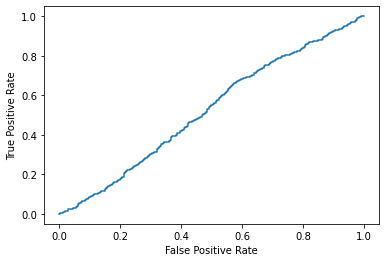

In [897]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

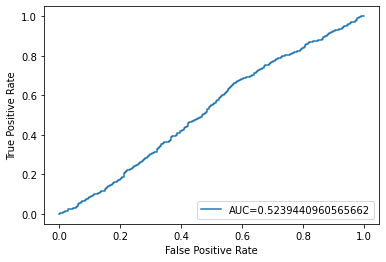

In [898]:
y_pred_proba = clf_reg.predict_proba(X_test.reshape(-1, 1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


# <span style="color:purple"> 2 Building the components of the harness </span>

## 2.1 Coding

###  2.1.1 `preprocessor`

#### 2.1.1.1 Please use your code from 1.1 to write your `preprocessor` function. Please test your code on the training sample to confirm that it produces the same results as in 1.3.1.1. Make sure to match the specs given in 0.2.

In [996]:
# HW01_SPX[HW01_SPX["Date_L01d"] == "2017-07-17"]
train = HW01_SPX[:4411].reset_index(drop=True)
#I had to reindex since the statsmodel couldn't interpret default indexing

In [1135]:
def preprocessor(df, preproc_params = {}, new = True):
    new_df = pd.DataFrame(df)
    preproc_params = {"mean":new_df.mean(), "standard deviation": new_df.std()}
    return(pd.DataFrame(new_df), preproc_params)

In [1136]:
preprocessor(test)

/Users/seonhyeyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


(       Date_L01d  Open_L01d  High_L01d  Low_L01d  Close_L01d  LOG_RETURN_L01d  \
 0     2017-07-18    2455.88    2460.92   2450.34     2460.61         0.000598   
 1     2017-07-19    2463.85    2473.83   2463.85     2473.83         0.005358   
 2     2017-07-20    2475.56    2477.62   2468.43     2473.45        -0.000154   
 3     2017-07-21    2467.40    2472.54   2465.06     2472.54        -0.000368   
 4     2017-07-24    2472.04    2473.10   2466.32     2469.91        -0.001064   
 ...          ...        ...        ...       ...         ...              ...   
 1002  2021-07-12    4372.41    4386.68   4364.03     4384.63         0.003445   
 1003  2021-07-13    4381.07    4392.37   4366.92     4369.21        -0.003523   
 1004  2021-07-14    4380.11    4393.68   4362.36     4374.30         0.001164   
 1005  2021-07-15    4369.02    4369.02   4340.70     4360.03        -0.003268   
 1006  2021-07-16    4367.43    4375.09   4322.53     4327.16        -0.007568   
 
       30_vol_

In [979]:
type(train)

pandas.core.frame.DataFrame

#### 2.1.1.2 Please test your `preprocessor` code on the training sample to confirm that it produces the same results as in 1.3.1.1.

In [1000]:
preprocessor(train)

/Users/seonhyeyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


(       Date_L01d  Open_L01d  High_L01d  Low_L01d  Close_L01d  LOG_RETURN_L01d  \
 0     2000-02-15    1402.05    1407.81   1376.21     1402.05         0.008675   
 1     2000-02-16    1387.67    1404.72   1385.58     1387.67        -0.010309   
 2     2000-02-17    1388.26    1399.83   1380.07     1388.26         0.000425   
 3     2000-02-18    1346.09    1388.26   1345.29     1346.09        -0.030847   
 4     2000-02-22    1352.17    1358.11   1331.97     1352.17         0.004507   
 ...          ...        ...        ...       ...         ...              ...   
 4406  2017-08-21    2425.50    2430.58   2417.35     2428.37         0.001162   
 4407  2017-08-22    2433.75    2454.77   2433.67     2452.51         0.009892   
 4408  2017-08-23    2444.88    2448.91   2441.42     2444.04        -0.003460   
 4409  2017-08-24    2447.91    2450.39   2436.19     2438.97        -0.002077   
 4410  2017-08-25    2444.72    2453.96   2442.22     2443.05         0.001671   
 
       positiv

### 2.1.2 `estimator`

####  2.1.2.1 Please use your code in 1.2.3 to write the function `estimator`.  Make sure to match the specs given in 0.2.

One way to do this is to create a harness function for your estimation, e.g.,
```python
def my_estimation_fn(df):
    import import statsmodels.formula.api as smf
    
    f = 'y ~ x1 + x2 + x3
    model_ols = sm.ols(f, data=df).fit(disp=0)
    return(model_ols)
```

Of course there are more elegant approaches to acomplishing this that would be more extensible, and you can experiment with these when you have the time.

In [949]:
def estimator(df, fitting_algo, est_params = {}):
    import statsmodels.api as sm
    
    y = (df[["positive_return_variable"]])
    x = (df[["30_vol_std","LOG_RETURN_L01d"]])
    log_reg_1 = sm.Logit(y, x).fit()
    model = log_reg_1
    return(model)

#### 2.1.2.2 Please test your code on the training sample to confirm that it produces the same results as in 1.2.3.

In [950]:
Logit = sm.Logit(y, x)
estimator(train, Logit)

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4


###  2.1.3 `predictor`

 
#### 2.1.3.1 Please use your code from 1.3.1.2 to write the function `predictor`. Make sure to match the specs given in 0.2.

In [944]:
def predictor(new_df, model):
    import statsmodels.api as sm
    
    y = new_df[["positive_return_variable"]]
    x = new_df[["30_vol_std","LOG_RETURN_L01d"]]

    log_reg_1 = sm.Logit(y, x).fit()
    predictions = log_reg_1.predict()
    return(predictions)


#### 2.1.3.2 Please test your `predictor` function using the training data and confirm that the results match your previous results.

In [945]:
Logit = sm.Logit(y, x)
predictor(train, Logit)

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4


array([0.47247108, 0.51637144, 0.4934653 , ..., 0.51820777, 0.51525513,
       0.50739143])

### 2.1.4 `predictor_harness`

 
#### 2.1.4.1 Please write the function `predictor_harness`. Make sure to match the specs given in 0.2.

This harness will take in a dataframe, a model and some preprocessing function (as well as any additional arguments you may require) and produce a vector of predictions of the same length as the number of rows in the dataframe.

In [ ]:
def predictor_harness(new_df, model, preprocessor, preproc_params = {}):
    new_df = df
    y = new_df[["positive_return_variable"]]
    x = new_df[["30_vol_L01d_standardized","LOG_RETURN_L01d"]]

    model = sm.Logit(y, x).fit()
    
    return(predictions)

### 2.1.5 `walk_forward_harness`

#### 2.1.5.1 Please write your `walk_forward_harness` function.  Be sure to match the specs given in 0.2.
This is the main function you will be calling to test your model.  

In [1104]:
def walk_forward_harness(df, preprocessor, estimator, predictor, 
                         start, date_col = 'Date', step_size = 1):     
    from sklearn.metrics import roc_auc_score as AUC

    predictions = []
    model_list = []
    stats_list = []
    
    y_1 = "positive_return_variable"
    x_1 = [["30_vol_std","LOG_RETURN_L01d"]]
    new_df = df

    start_split = new_df[new_df[date_col+'_L01d']==start].index[0]
    split = start_split

    while split < len(new_df):
        #estimation
        train = new_df.iloc[:split]
        test = new_df.iloc[split:]
        
        y = new_df[["positive_return_variable"]]
        x = new_df[["30_vol_std","LOG_RETURN_L01d"]]
        log_reg_1 = sm.Logit(y, x).fit()
        model_list.append(log_reg_1)

#         Prediction
        pred = log_reg_1.predict()
        predictions.append(pred)

        #Statistic
        real = test[y_1]
        stats_list.append(AUC(real,pred))

        split += step_size


    return(predictions, model_list, stats_list)

## 2.2 Validation (a little bit)

### 2.2.1 SW testing

#### 2.2.1.1Please test your `walk_forward_harness` function
You may wish to include the `progress_bar` function at the beginning of the notebook to provide feedback since w.f. analysis can be very time consuming. 

In [989]:
HW01_SPX=HW01_SPX.reset_index(drop=True)

In [1002]:
e = estimator(train, Logit)

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4


In [1003]:
preprocessor=preprocessor(train)
# walk_forward_harness(HW01_SPX)

/Users/seonhyeyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [1053]:
p = predictor(train, Logit)

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4


In [1105]:
walk_forward_harness(train, preprocessor, e, p, "2000-02-15", "Date")

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691500
  

([array([0.47247108, 0.51637144, 0.4934653 , ..., 0.51820777, 0.51525513,
         0.50739143]),
  array([0.47247108, 0.51637144, 0.4934653 , ..., 0.51820777, 0.51525513,
         0.50739143]),
  array([0.47247108, 0.51637144, 0.4934653 , ..., 0.51820777, 0.51525513,
         0.50739143]),
  array([0.47247108, 0.51637144, 0.4934653 , ..., 0.51820777, 0.51525513,
         0.50739143]),
  array([0.47247108, 0.51637144, 0.4934653 , ..., 0.51820777, 0.51525513,
         0.50739143]),
  array([0.47247108, 0.51637144, 0.4934653 , ..., 0.51820777, 0.51525513,
         0.50739143]),
  array([0.47247108, 0.51637144, 0.4934653 , ..., 0.51820777, 0.51525513,
         0.50739143]),
  array([0.47247108, 0.51637144, 0.4934653 , ..., 0.51820777, 0.51525513,
         0.50739143]),
  array([0.47247108, 0.51637144, 0.4934653 , ..., 0.51820777, 0.51525513,
         0.50739143]),
  array([0.47247108, 0.51637144, 0.4934653 , ..., 0.51820777, 0.51525513,
         0.50739143]),
  array([0.47247108, 0.5163714

### 2.2.2 Model performance
__Please produce the following exhibits:__

####  2.2.2.1 An ROC curve and AUC for _all_ walk-forward predictions

####  2.2.2.2 An ROC curve and AUC for walk-forward predictions on days when the (previous day's) 30 day volatility was above (below) the median in the training data.

#### 2.2.2.3 A line plot showing the coefficient on the variable 30 day volatility for each step of the walk-forward analysis

### 2.2.3 One more thing...


#### 2.2.3.1 In your own words, please describe why walk-forward analysis is useful? Give an example of a scenario in which you would use it? When would it be wise to steer clear of using walkforward analysis.

A walk forward analysis is useful because optimisations can give some insight of the future. A walk forward analysis is a way for testing trading strategy by finding the optimal trading parameters in specific time period, either in cample or training data. Then we check the performance of the parameters in speicific periods of time. 

For example, lets say a company wants to trade a certain crypto currency. They can use walk forward optimization to find optimal trading parameters in a given specific period and check the performance (lets say performance is measured by price) of the parameters in the follwoing time period. 


## 2.3 Extra Credit* (not required)

### 2.3.1Flexing with more modeling tricks 

#### 2.3.1.1 See if you can build a model that performs better in walk-forward analysis than your logit model did.  You may use additional tranformations and additional variables from the data set or that you have created from the current variables in the data set; and you may use other algorithms such as recursive partitioning, Naive Bayes, etc.

In [1149]:
def walk_forward_harness_1(df, preprocessor, estimator, predictor, 
                         start, date_col = 'Date', step_size = 1):     
    from sklearn.metrics import roc_auc_score as AUC
    import numpy as np

    predictions = []
    model_list = []
    stats_list = []
    
    y_1 = "positive_return_variable"
    x_1 = [["30_vol_std","LOG_RETURN_L01d"]]
    new_df = df

    start_split = new_df[new_df[date_col+'_L01d']==start].index[0]
    split = start_split

    while split < len(new_df):
        #estimation
        train = new_df.iloc[:split]
        test = new_df.iloc[split:]
        
        y = new_df[["positive_return_variable"]]
        x = new_df[["LOG_RETURN_L01d"]]
        log_reg_1 = sm.Logit(y, x).fit()
        model_list.append(log_reg_1)

#         Prediction
        pred = log_reg_1.predict()
        predictions.append(pred)

        #Statistic
        r = test[y_1]
        stats_list.append(AUC(r,pred))

        split += step_size


    return(predictions, model_list, stats_list)

In [1150]:
walk_forward_harness_1(train, preprocessor, e, p, "2000-02-15", "Date")

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691826
  

([array([0.4816395 , 0.52181589, 0.4990999 , ..., 0.50732503, 0.504397  ,
         0.49646084]),
  array([0.4816395 , 0.52181589, 0.4990999 , ..., 0.50732503, 0.504397  ,
         0.49646084]),
  array([0.4816395 , 0.52181589, 0.4990999 , ..., 0.50732503, 0.504397  ,
         0.49646084]),
  array([0.4816395 , 0.52181589, 0.4990999 , ..., 0.50732503, 0.504397  ,
         0.49646084]),
  array([0.4816395 , 0.52181589, 0.4990999 , ..., 0.50732503, 0.504397  ,
         0.49646084]),
  array([0.4816395 , 0.52181589, 0.4990999 , ..., 0.50732503, 0.504397  ,
         0.49646084]),
  array([0.4816395 , 0.52181589, 0.4990999 , ..., 0.50732503, 0.504397  ,
         0.49646084]),
  array([0.4816395 , 0.52181589, 0.4990999 , ..., 0.50732503, 0.504397  ,
         0.49646084]),
  array([0.4816395 , 0.52181589, 0.4990999 , ..., 0.50732503, 0.504397  ,
         0.49646084]),
  array([0.4816395 , 0.52181589, 0.4990999 , ..., 0.50732503, 0.504397  ,
         0.49646084]),
  array([0.4816395 , 0.5218158